In [ ]:
# Objectives: 
#        1) Use citipy to extract city names from lon and lat values
#        2) For each of the cities extract weather conditions using api
#        3) Plot scatter plots for lat values vs weather data
#        4) Perform regression analysis for lat values vs weather data      

In [ ]:
# pip install citipy

In [28]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from config import weather_api_key

In [29]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

601
['udachny', 'ciudad lazaro cardenas', 'hawaiian paradise park', 'port lincoln', 'edinburgh of the seven seas', 'petropavlovsk-kamchatsky', "petrovsk-zabaykal'skiy", 'telgte', 'owerri', 'margaret river', 'blackmans bay', 'bengkulu', 'iqaluit', 'sivrihisar', 'saint-philippe', 'grytviken', 'anadyr', 'atafu village', 'arraial do cabo', 'laminusa', 'waitangi', 'pudozh', 'la ronge', 'stanley', 'puerto natales', 'college', 'mount darwin', 'bredasdorp', 'wynyard', 'xai-xai', 'benguela', 'bilibino', 'mogocha', 'vingt cinq', 'oranjemund', 'alaghsas', 'nuuk', 'albany', 'sitka', 'ilulissat', 'shache', 'vorgashor', 'al burayqah', 'pakisaji', 'papatowai', 'invercargill', 'mata-utu', 'rosetta', 'talnakh', 'thompson', 'yellowknife', 'cill airne', "hayma'", 'hermanus', 'alice springs', 'rudnichnyy', 'port-aux-francais', 'lubang', 'ribeira grande', 'aykhal', 'tofol', 'newman', 'adamstown', 'taulaga', 'susuman', 'lebu', 'pierre', 'hammerfest', 'mejit', 'tres arroyos', 'alexandria', 'tambo', 'codringt

In [30]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
print("Done!")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Done!


In [31]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64


In [32]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,-10.57,96,75,3.51,RU,1698198233
1,ciudad lazaro cardenas,17.9583,-102.2000,25.91,82,100,2.58,MX,1698198233
2,hawaiian paradise park,19.5933,-154.9731,28.73,85,75,3.60,US,1698198234
3,port lincoln,-34.7333,135.8667,13.74,40,81,9.93,AU,1698197986
4,edinburgh of the seven seas,-37.0676,-12.3116,12.16,88,41,10.03,SH,1698198234


In [34]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [35]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-10.57,96,75,3.51,RU,1698198233
1,ciudad lazaro cardenas,17.9583,-102.2000,25.91,82,100,2.58,MX,1698198233
2,hawaiian paradise park,19.5933,-154.9731,28.73,85,75,3.60,US,1698198234
3,port lincoln,-34.7333,135.8667,13.74,40,81,9.93,AU,1698197986
4,edinburgh of the seven seas,-37.0676,-12.3116,12.16,88,41,10.03,SH,1698198234


C:\Users\19163\AppData\Local\Temp\ipykernel_18640\3560225135.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


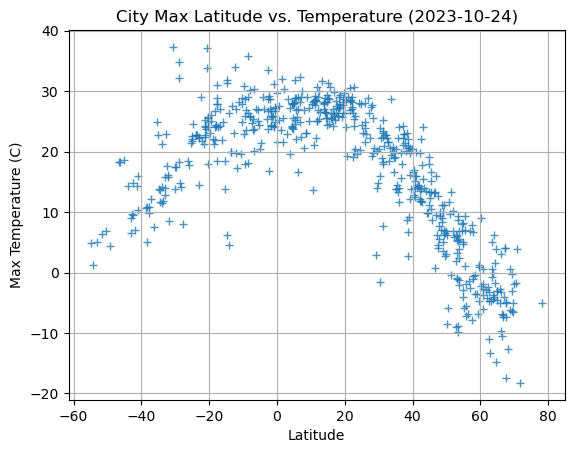

In [39]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

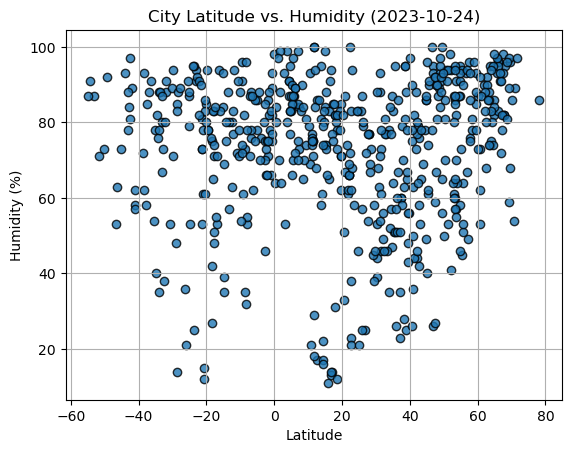

In [42]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

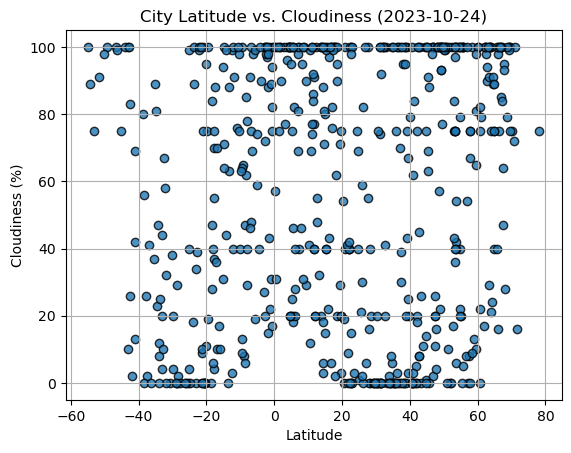

In [43]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

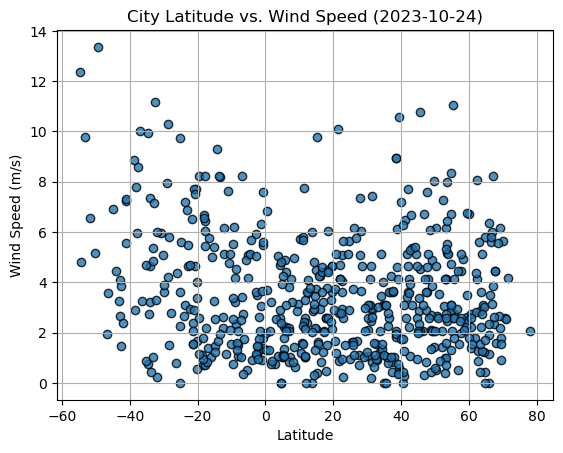

In [44]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [50]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [51]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-10.57,96,75,3.51,RU,1698198233
1,ciudad lazaro cardenas,17.9583,-102.2000,25.91,82,100,2.58,MX,1698198233
2,hawaiian paradise park,19.5933,-154.9731,28.73,85,75,3.60,US,1698198234
5,petropavlovsk-kamchatsky,53.0452,158.6483,5.33,61,75,1.00,RU,1698198234
6,petrovsk-zabaykal'skiy,51.2730,108.8430,-0.47,53,10,3.52,RU,1698198234


In [52]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port lincoln,-34.7333,135.8667,13.74,40,81,9.93,AU,1698197986
4,edinburgh of the seven seas,-37.0676,-12.3116,12.16,88,41,10.03,SH,1698198234
9,margaret river,-33.9500,115.0667,21.22,35,12,7.36,AU,1698198235
10,blackmans bay,-43.0167,147.3167,9.07,78,100,2.68,AU,1698198235
11,bengkulu,-3.8004,102.2655,27.06,76,90,0.93,ID,1698197995


The r-squared value is: 0.7980889398238182
The r value is: -0.8933582371164539


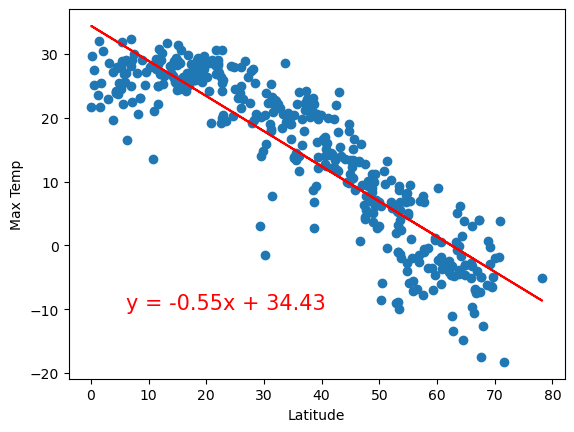

In [53]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-squared value is: 0.4776139180452389
The r value is: 0.6910961713432067


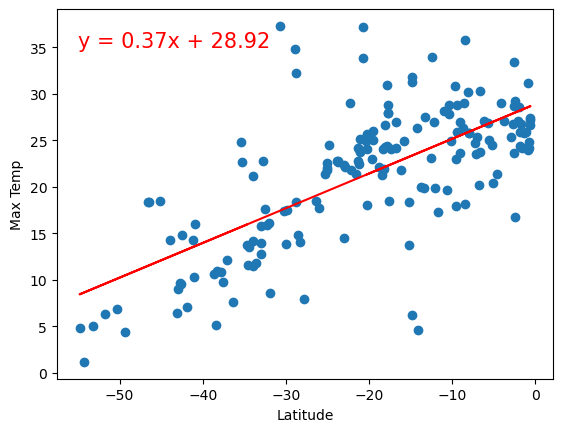

In [54]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-squared value is: 0.025564154144477404
The r value is: 0.15988794246120439


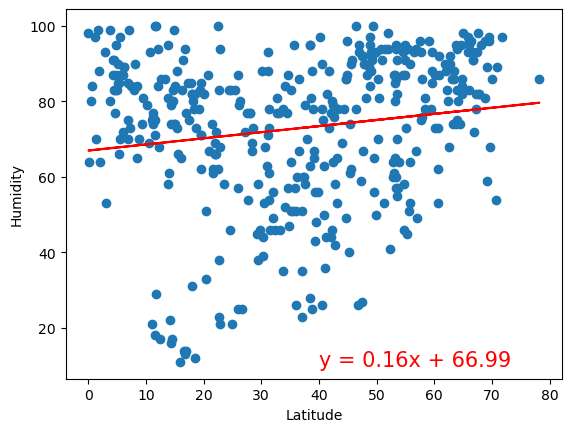

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-squared value is: 0.00010096975087488244
The r value is: -0.010048370558199097


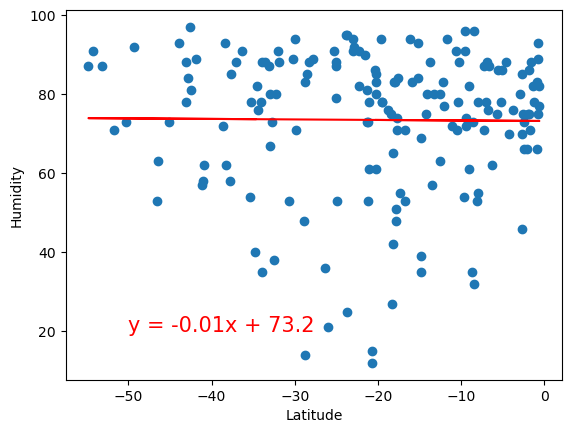

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-squared value is: 0.003045769897679544
The r value is: 0.05518849425088117


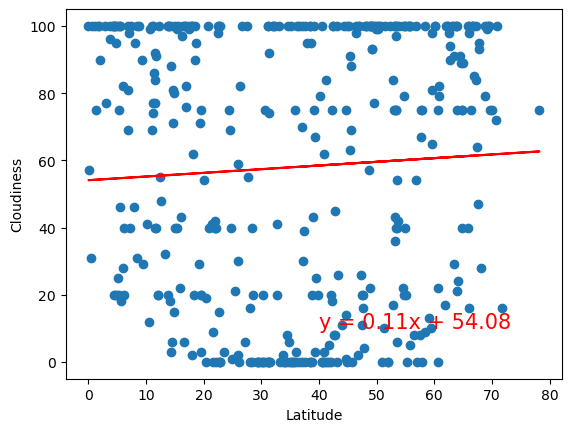

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared value is: 0.02319292871455789
The r value is: 0.15229224771654626


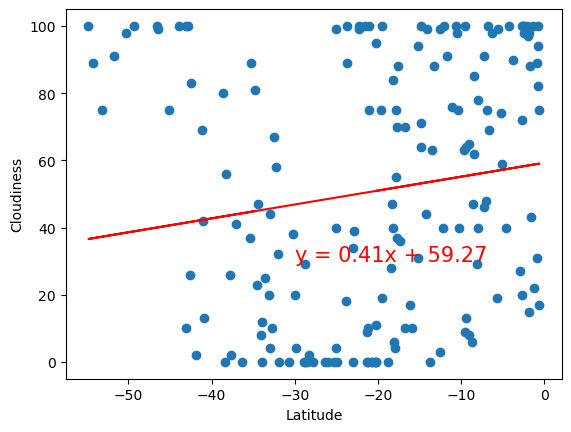

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-squared value is: 0.012147287198963373
The r value is: 0.11021473222289012


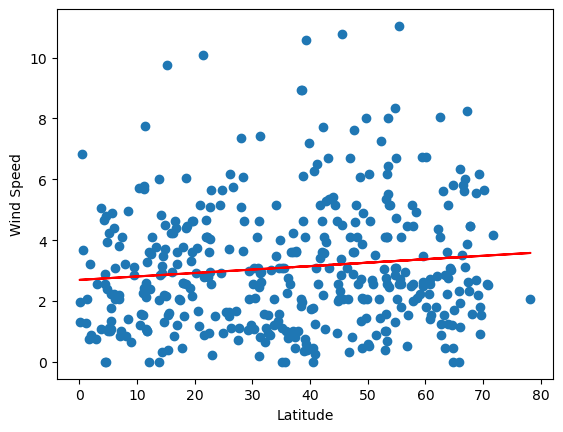

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.10831963592345517
The r value is: -0.3291194857851099


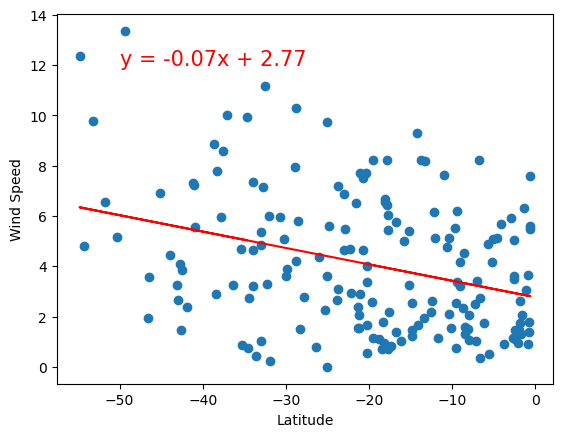

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))